# EDA PROJECT

### * 노인빈곤율에 대한 사회적 이슈

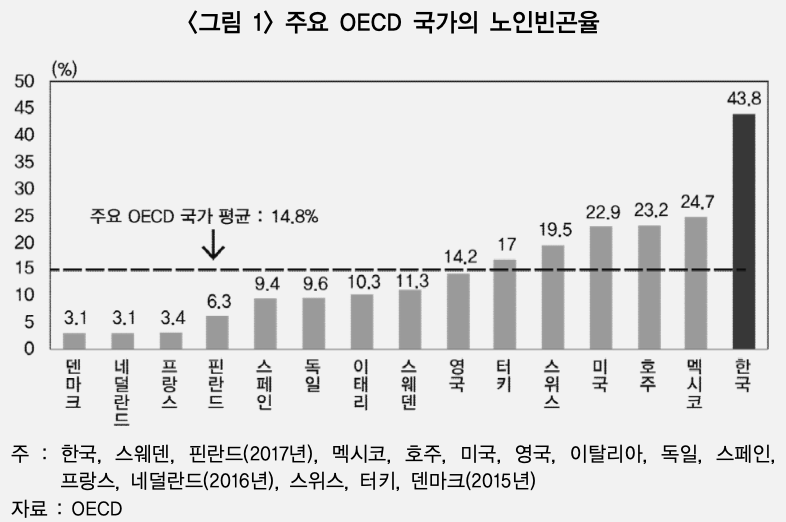

In [176]:
from IPython.display import Image
Image("Img/1.png", width = "1000")

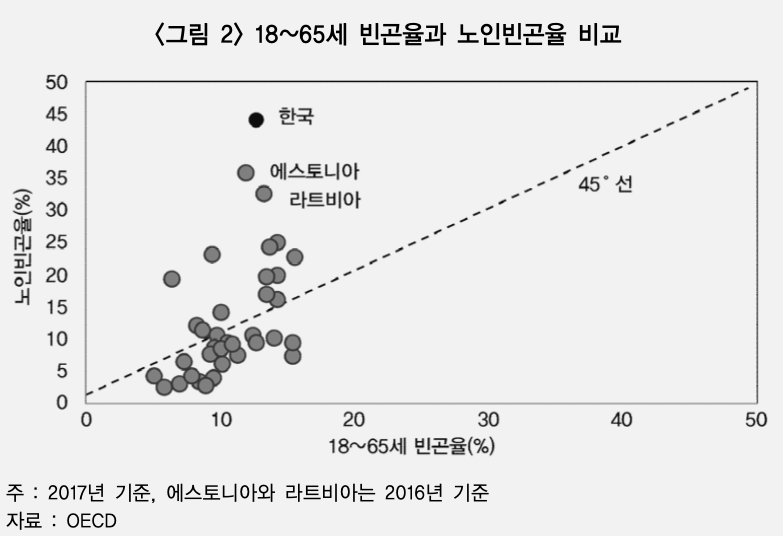

In [46]:
Image("Img/2.png", width = "1000", embed=True)

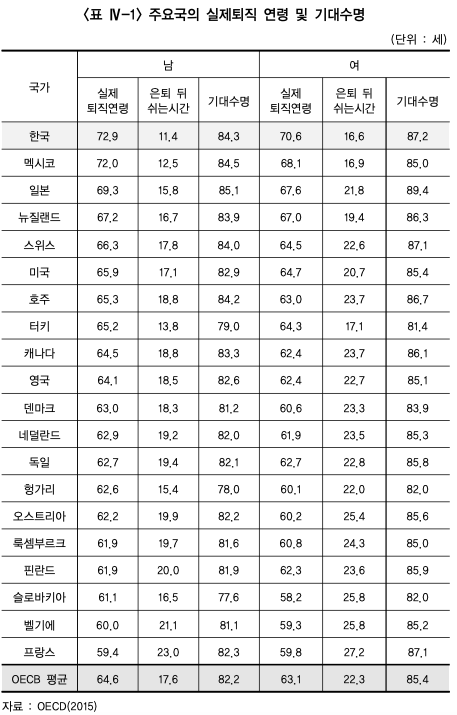

In [47]:
Image("Img/3.png")

### * 연구 목적
- 대한민국의 노인빈곤율을 줄이고 은퇴 후 여유로운 삶을 즐길 수 있도록 젊을 때부터 시작해야 하는 이상적인 포트폴리오 찾기

### 1. 데이터 수집 
- weekly data
- Index(지수) Data(96.07.01 ~ 20.06.29)
    - SP_Index(주식), Interm_Index(중기채), Long_Index(장기채), Commodity_Index(원자재), Gold_Index(금)
- ETF(상품) Data(06.06.26 ~ 20.06.29)
    - SPY(주식 ETF), IEF(중기채 ETF), TLT(장기채 ETF), DBC(원자재 ETF), GLD(금 ETF)

In [48]:
# Index Data 수집

sp_index = pd.read_csv("./data/S&P_Index.csv")
gold_index = pd.read_csv("./data/Gold_Index.csv")
commodity_index = pd.read_csv("./data/Commodity_Index.csv")
interm_index = pd.read_csv("./data/Intermediate_Term_Bond_Index.csv")
long_index = pd.read_csv("./data/Long_Term_Bond_Index.csv")

# ETF(상품) data 수집

spy_etf = pd.read_csv("./data/SPY.csv")
gld_etf = pd.read_csv("./data/Gld.csv")
dbc_etf = pd.read_csv("./data/DBC.csv")
ief_etf = pd.read_csv("./data/IEF.csv")
tlt_etf = pd.read_csv("./data/TLT.csv")

### 2. 데이터 전처리

In [167]:
# index df

closes_df = pd.DataFrame({'Date' : sp_index["Date"].copy(),
                          'SP_Close' : sp_index["Close"].copy(),
                          'Long_Close' : long_index["Close"].copy(),
                          'Interm_Close' : interm_index["Close"].copy(),
                          'Commodity_Close' : commodity_index["Close"].copy(),
                          'Gold_Close' : gold_index["Close"].copy()}).round(2)

closes_df = closes_df.set_index('Date', drop = True, append = False, verify_integrity = True)

closes_df

,SP_Close,Long_Close,Interm_Close,Commodity_Close,Gold_Close
Date,,,,,
1996.7.1,657.44,9.41,10.07,207.88,382
1996.7.8,646.19,9.58,10.18,210.44,384
1996.7.15,638.73,9.64,10.22,198.54,385
1996.7.22,635.90,9.60,10.19,193.01,386
1996.7.29,662.49,9.87,10.38,200.48,388
...,...,...,...,...,...
2020.6.1,3193.93,14.93,12.03,325.54,1683
2020.6.8,3041.31,15.51,12.12,314.28,1737
2020.6.15,3097.74,15.51,12.13,327.64,1753


* 주간 수익률
- EDA 

In [50]:
index_df = (closes_df.shift(1) - closes_df) / closes_df.shift(1)
index_df

,SP_Close,Long_Close,Interm_Close,Commodity_Close,Gold_Close
Date,,,,,
1996.7.1,NaN,NaN,NaN,NaN,NaN
1996.7.8,0.017112,-0.018066,-0.010924,-0.012315,-0.005236
1996.7.15,0.011545,-0.006263,-0.003929,0.056548,-0.002604
1996.7.22,0.004431,0.004149,0.002935,0.027853,-0.002597
1996.7.29,-0.041815,-0.028125,-0.018646,-0.038703,-0.005181
...,...,...,...,...,...
2020.6.1,-0.049147,0.043562,0.008244,-0.060115,0.031088
2020.6.8,0.047784,-0.038848,-0.007481,0.034589,-0.032086
2020.6.15,-0.018555,0.000000,-0.000825,-0.042510,-0.009211


* 누적 수익률

In [51]:
cumul_index_df = (closes_df - closes_df.iloc[0]) / closes_df.iloc[0] 
cumul_index_df

,SP_Close,Long_Close,Interm_Close,Commodity_Close,Gold_Close
Date,,,,,
1996.7.1,0.000000,0.000000,0.000000,0.000000,0.000000
1996.7.8,-0.017112,0.018066,0.010924,0.012315,0.005236
1996.7.15,-0.028459,0.024442,0.014896,-0.044930,0.007853
1996.7.22,-0.032763,0.020191,0.011917,-0.071532,0.010471
1996.7.29,0.007681,0.048884,0.030785,-0.035597,0.015707
...,...,...,...,...,...
2020.6.1,3.858132,0.586610,0.194638,0.566000,3.405759
2020.6.8,3.625989,0.648247,0.203575,0.511834,3.547120
2020.6.15,3.711822,0.648247,0.204568,0.576102,3.589005


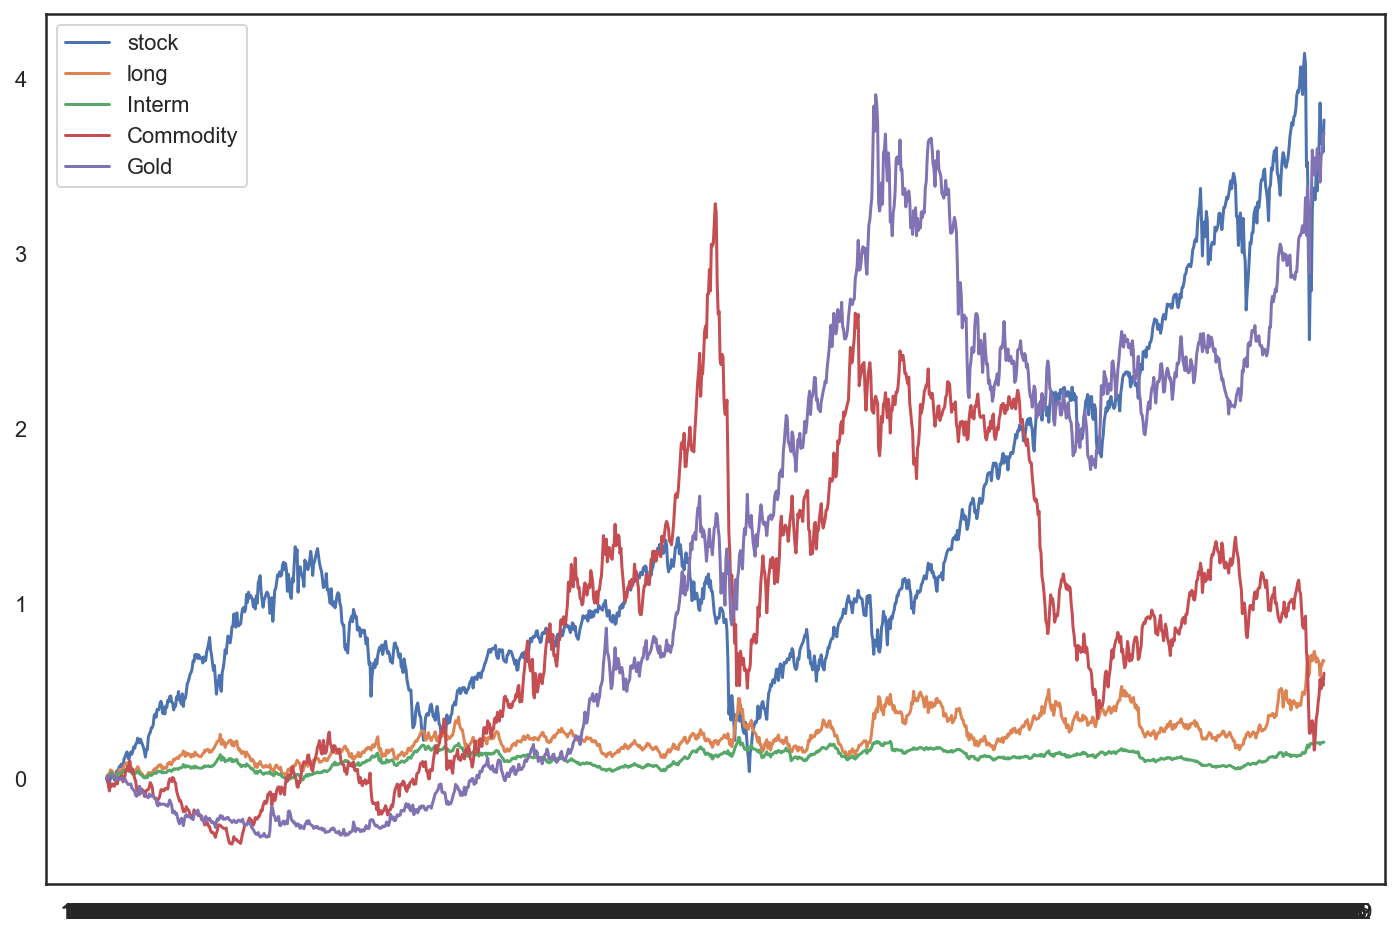

In [66]:
from matplotlib import pyplot as plt

plt.figure(figsize = (12,8))

plt.plot(cumul_index_df.index,cumul_index_df.SP_Close, label = "stock")
plt.plot(cumul_index_df.index,cumul_index_df.Long_Close, label = "long")
plt.plot(cumul_index_df.index,cumul_index_df.Interm_Close, label = "Interm")
plt.plot(cumul_index_df.index,cumul_index_df.Commodity_Close, label = "Commodity")
plt.plot(cumul_index_df.index,cumul_index_df.Gold_Close, label = "Gold")

plt.legend()
plt.show()

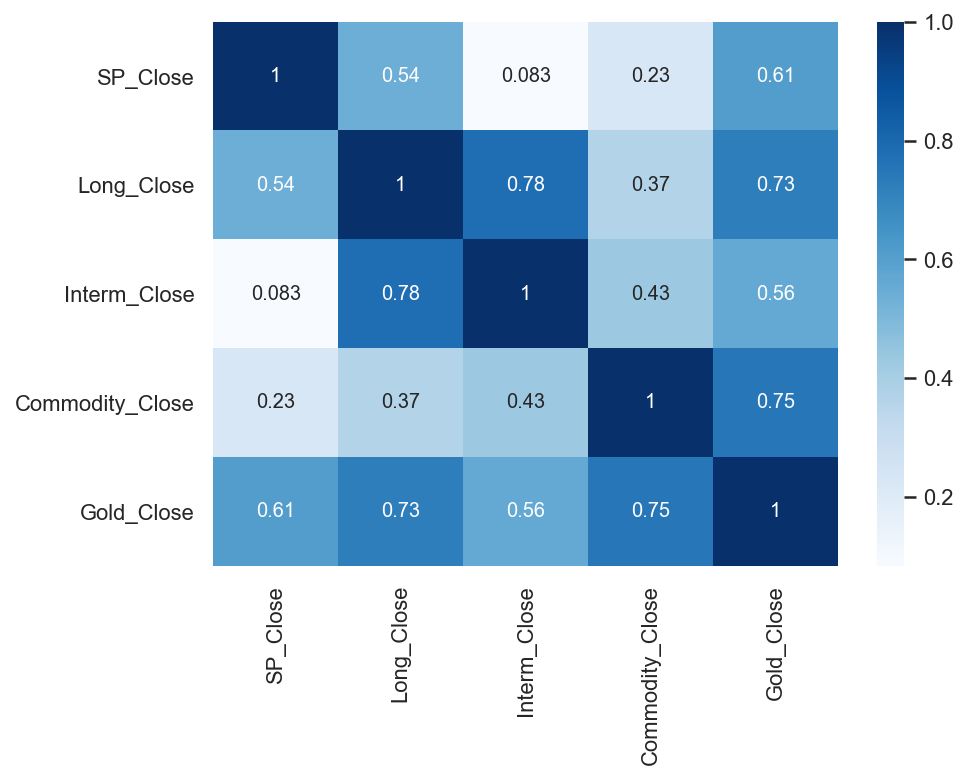

In [60]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (7,5))

sns.heatmap(data = cumul_index_df.corr(), annot = True, cmap = "Blues")

### 포트폴리오 구성
- portfolio_1 : 주식 100%
- portfolio_2 : 주식 60% + 장기채 40%
- portfolio_3 : All_Weather : 주식 30% + 장기채 40% + 중기채 15% + 원자재 7.5% + 금 7.5%

* portfolio_2 : 주식시장과 상관관계가 낮은 상품 중 장기 누적 수익률이 좋은 자산으로 포트폴리오 구성
* portfolio_3 : 2번보다 넓은 범위의 자산 범주를 추가하여 포트폴리오 구성 

In [54]:
def get_port_return(sp_index_weight, long_index_weight, interm_index_weight, 
                                commodity_index_weight, gold_index_weight):
    
    return (index_df * [sp_index_weight, long_index_weight, interm_index_weight, 
                                    commodity_index_weight, gold_index_weight]).sum(axis=1)

In [55]:
def get_port_cumul_return(sp_index_weight, long_index_weight, interm_index_weight, 
                                commodity_index_weight, gold_index_weight):
    
    return (cumul_index_df * [sp_index_weight, long_index_weight, interm_index_weight, 
                                    commodity_index_weight, gold_index_weight]).sum(axis=1)

In [126]:
# 포트폴리오 자산 배분
equity_names = ["Stock", "Interm_bond", "Long_bond", "Commodity", "Gold"]

ratio1 = [1, 0, 0, 0, 0]
ratio2 = [0.6, 0.4, 0, 0, 0]
ratio3 = [0.3, 0.4, 0.15, 0.075, 0.075]

In [127]:
# 교통사고평균df['교통사고'].plot.pie(labels=['전체', '사망', '부상'],
#                                  colors=['#ff6600', '#0066ff', '#ffff00'], 
#                                  explode=[0.0, 0.1, 0.0], 
#                                  autopct='%0.1f%%', 
#                                  shadow=True, 
#                                  startangle=90)

# # 제목지정
# pyplot.title("교통사고 비율")

# # y축 라벨 표시 안함
# pyplot.ylabel(None)

# pyplot.show()

In [128]:
# plt.pie(ratio1, labels=equity_names, autopct='%0.1f%%',)
# # plt.title('portfolio_1 : stock 100%', fontsize=20)
# plt.legend()

# plt.show()

In [129]:
# plt.pie(ratio2, labels=equity_names, autopct='%0.1f%%')
# plt.legend() 
# plt.show() 

In [130]:
# plt.pie(ratio3, labels=equity_names, autopct='%0.1f%%')
# plt.legend() 

In [131]:
# portfolio_1
df1 = pd.DataFrame({"Stock100%" : get_port_return(*ratio1)})

In [132]:
# portfolio_2
df2 = pd.DataFrame({"S6:B4" : get_port_return(*ratio2)} )

In [133]:
# portfolio_3
df3 =pd.DataFrame({"All Weather" : get_port_return(*ratio3)} )

In [134]:
# df3 =pd.DataFrame({"S5:G5" : get_port_return(*ratio4)} )

In [145]:
port_df = pd.DataFrame({"Stock100%" : df1["Stock100%"], 
                        "S6:B4" : df2["S6:B4"],
                        "All Weather" : df3["All Weather"]
                       })
port_df.tail(2) 

,Stock100%,S6:B4,All Weather
Date,,,
2020.6.22,0.028631,0.010731,0.002925
2020.6.29,-0.040199,-0.023104,-0.015072


In [136]:
# port_df["win"] = int

# for i in range(1253):
#     if (port_df["S5:G5"].iloc[i] > 0):
#         port_df["win"].iloc[i] = 1
        
#     elif (port_df["S5:G5"].iloc[i] > port_df["Stock100%"].iloc[i]):
#         port_df["win"].iloc[i] = 1    
        
#     else:
#         port_df["win"].iloc[i] = 0
        
# port_df

In [146]:
port_df["win"] = 1

for i in range(1253):
    if (port_df["All Weather"].iloc[i] > 0):
        port_df["win"].iloc[i] = 1
        
    elif (port_df["All Weather"].iloc[i] > port_df["S6:B4"].iloc[i])&(port_df["All Weather"].iloc[i]> port_df["Stock100%"].iloc[i]):
        port_df["win"].iloc[i] = 1    
        
    else:
        port_df["win"].iloc[i] = 0
        
port_df

,Stock100%,S6:B4,All Weather,win
Date,,,,
1996.7.1,0.000000,0.000000,0.000000,0
1996.7.8,0.017112,0.003041,-0.005048,0
1996.7.15,0.011545,0.004422,0.004415,1
1996.7.22,0.004431,0.004318,0.005323,1
1996.7.29,-0.041815,-0.036339,-0.029883,1
...,...,...,...,...
2020.6.1,-0.049147,-0.012064,0.001740,1
2020.6.8,0.047784,0.013131,-0.002138,0
2020.6.15,-0.018555,-0.011133,-0.009569,1


### 3. 데이터 분석


In [147]:
from sklearn.model_selection import train_test_split

In [148]:
X = port_df.drop(["win"], axis =1)
y = port_df["win"] 

In [149]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

np.unique(y_train, return_counts=True)

(array([0, 1]), array([259, 743]))

In [150]:
from sklearn.tree import DecisionTreeClassifier

port_df = DecisionTreeClassifier(max_depth = 5, random_state = 13)
port_df.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=13, splitter='best')

In [151]:
from sklearn.metrics import accuracy_score

y_pred_tr = port_df.predict(X_train)
y_pred_test = port_df.predict(X_test)

print("Train : ", accuracy_score(y_train, y_pred_tr))
print("Test : ", accuracy_score(y_test, y_pred_test))

Train :  0.9900199600798403
Test :  0.952191235059761


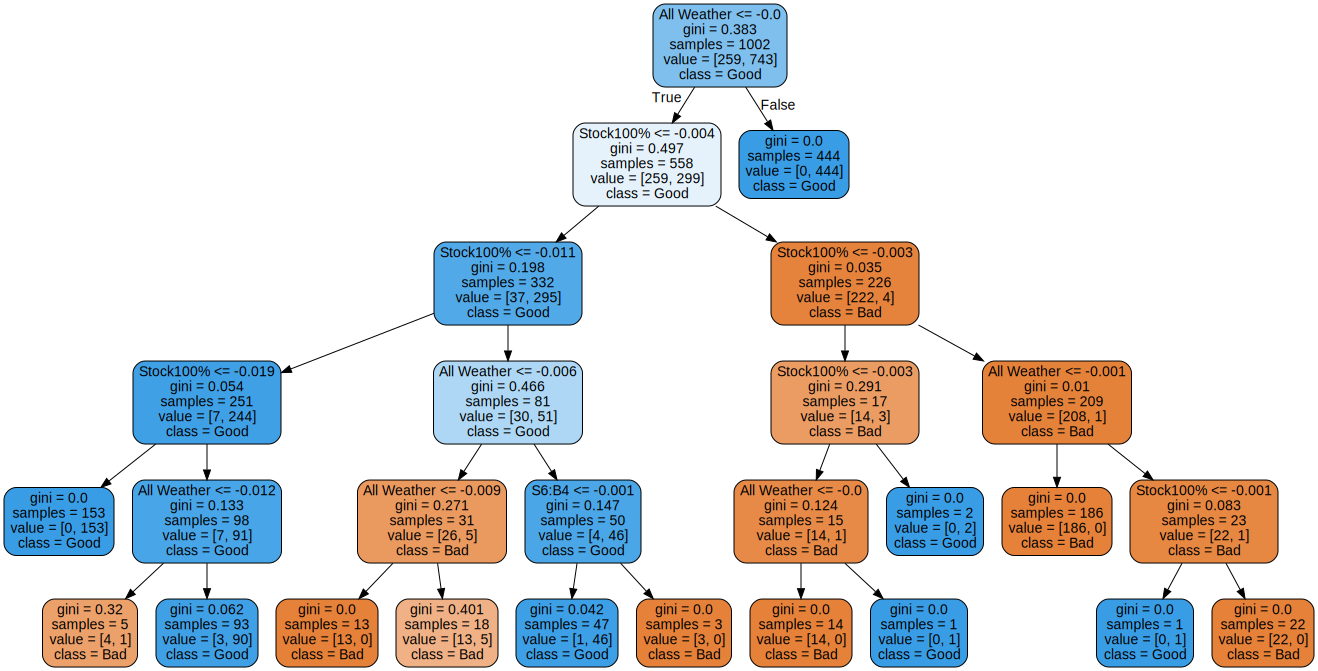

In [152]:
from graphviz import Source
from sklearn.tree import export_graphviz

Source(export_graphviz(port_df, feature_names = X_train.columns, class_names = ["Bad", "Good"],
                      rounded = True, filled = True))


In [153]:
dict(zip(X_train.columns, port_df.feature_importances_))

{'Stock100%': 0.6117889636056787,
 'S6:B4': 0.01470003829762509,
 'All Weather': 0.3735109980966963}

In [154]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5)
port_df_cv = DecisionTreeClassifier(max_depth=2, random_state=13)

In [155]:
for train_idx, test_idx in kfold.split(X):
    print(len(train_idx), len(test_idx))

1002 251
1002 251
1002 251
1003 250
1003 250


In [156]:
cv_accuracy = []

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    port_df_cv.fit(X_train, y_train)
    pred = port_df_cv.predict(X_test)
    cv_accuracy.append(accuracy_score(y_test, pred))
    
cv_accuracy

[0.952191235059761, 0.9362549800796812, 0.9601593625498008, 0.94, 0.956]

In [157]:
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits = 5)
port_df_cv = DecisionTreeClassifier(max_depth = 2, random_state = 13)

cv_accuracy = []

for train_idx, test_idx in skfold.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    port_df_cv.fit(X_train, y_train)
    pred = port_df_cv.predict(X_test)
    cv_accuracy.append(accuracy_score(y_test, pred))
    
cv_accuracy

[0.9362549800796812, 0.9402390438247012, 0.9681274900398407, 0.952, 0.96]

In [158]:
from sklearn.metrics import (accuracy_score, recall_score, precision_score, roc_auc_score, f1_score)

print("Accurancy : ", accuracy_score(y_test, pred))
print("Recall : ", recall_score(y_test, pred))
print("Precision : ", precision_score(y_test, pred))
print("AUC score : ", roc_auc_score(y_test, pred))
print("f1 score : ", f1_score(y_test, pred))

Accurancy :  0.96
Recall :  0.9893048128342246
Precision :  0.9585492227979274
AUC score :  0.9311603429250488
f1 score :  0.9736842105263158


In [159]:
# # 포트폴리오에 대한 누적수익률
# from matplotlib import pyplot as plt

# x_values = index_return.index
# y_values_1 = index_return.SP_Close
# y_values_2 = index_return.Long_Close
# y_values_3 = index_return.Long_Close
# y_values_4 = index_return.Commodity_Close
# y_values_5 = index_return.Gold_Close

# plt.plot(x_values, y_values_1)
# plt.plot(x_values, y_values_2)
# plt.plot(x_values, y_values_3)
# plt.plot(x_values, y_values_4)
# plt.plot(x_values, y_values_5)

# plt.show()

#### 1) 기대수익률 (return)

In [160]:
# 각 자산별 기대 수익률
# https://m.blog.naver.com/PostView.nhn?blogId=anthouse28&logNo=221640874003&proxyReferer=https:%2F%2Fwww.google.com%2F


import numpy as np
closes_df

# 각 자산별 weekly 로그 수익률 계산 
logret_df = np.log(closes_df/closes_df.shift(1))
logret_df = logret_df.dropna()
logret_df.columns = ["주식", "중기채","장기채","원자재","금"]
logret_df.head()

# 각 자산별 weekly 평균 로그 수익률 계산
week_mprofit = logret_df.mean()
week_mprofit

# 각 자산별 yearly 평균 로그 수익률 계산 
# 거래일 252 일 / 5 = 50.4주
# 벡터로 형변환 
year_mprofit = week_mprofit * 50.4
year_mprofit = year_mprofit.values
year_mprofit

# 각 자산별 년간 평균 6.3%, 2%, 0.8%, 1.9%, 6.2% 의 로그 수익률 예상 (소수점 넷째자리에서 반올림)

array([0.06281635, 0.02065759, 0.00759185, 0.01895076, 0.06217678])

In [161]:
# 포트폴리오별 기대 수익률

# 포트폴리오별 가중치
s = np.array(*ratio1)
s_6 = np.array([0.6, 0.4, 0, 0, 0])
aw = np.array([0.3, 0.4, 0.15, 0.075, 0.075])

# 가중치 * 자산별 년간 평균 로그 수익률 계산
s_return = s.dot(year_mprofit)
s_6_return = s_6.dot(year_mprofit)
aw_return = aw.dot(year_mprofit)


s_return,s_6_return,aw_return
# 년간 6.3%, 4.6%, 3.4% 로그 수익률 예상

# (10년 후 예상~~)

ValueError: only 2 non-keyword arguments accepted

#### 2) RISK 
##### 2-1) 변동성

In [162]:
# 변동성(기대 수익률 표준편차) 분석 
# 변동성이 적으면 안정적이다 ! 라는 결론 도출

# 자산별 로그 수익률
logret_df.head()
# 자산별 risk : 자산별 weekly 기대 수익률의 표준편차 
logret_df.std()

주식     0.025132
중기채    0.015287
장기채    0.006643
원자재    0.031062
금      0.023682
dtype: float64

In [163]:
# 포트폴리오별 risk
# 주별 로그 기대수익률 데이터 프레임 사용해 공분산 행렬
logret_df.cov()
# 년간 환산을 위해 * 50.4 
cov_mat = logret_df.cov()*50.4
# 행렬로 타입 변환
cov_mat = cov_mat.values  
cov_mat

#포트폴리오 년간 risk 계산 (분산으로 / 표준편차로 ?)

s_var = np.dot(np.dot(s,cov_mat), s.T)
s_risk = np.sqrt(s_var)
s_6_var = np.dot(np.dot(s_6,cov_mat), s_6.T)
s_6_risk = np.sqrt(s_6_var)
aw_var = np.dot(np.dot(aw,cov_mat), aw.T)
aw_risk = np.sqrt(aw_var)

print("주식 100% 포트폴리오 위험도 : ", s_risk)
print("주식 60%, 채권 40% 포트폴리오 위험도 : ", s_6_risk)
print("all weather 포트폴리오 위험도 : ", aw_risk)

주식 100% 포트폴리오 위험도 :  0.17842172809578413
주식 60%, 채권 40% 포트폴리오 위험도 :  0.1047665931970415
all weather 포트폴리오 위험도 :  0.07049222437405182


In [164]:
week_mprofit = logret_df.mean()
week_mprofit

주식     0.001246
중기채    0.000410
장기채    0.000151
원자재    0.000376
금      0.001234
dtype: float64

No handles with labels found to put in legend.


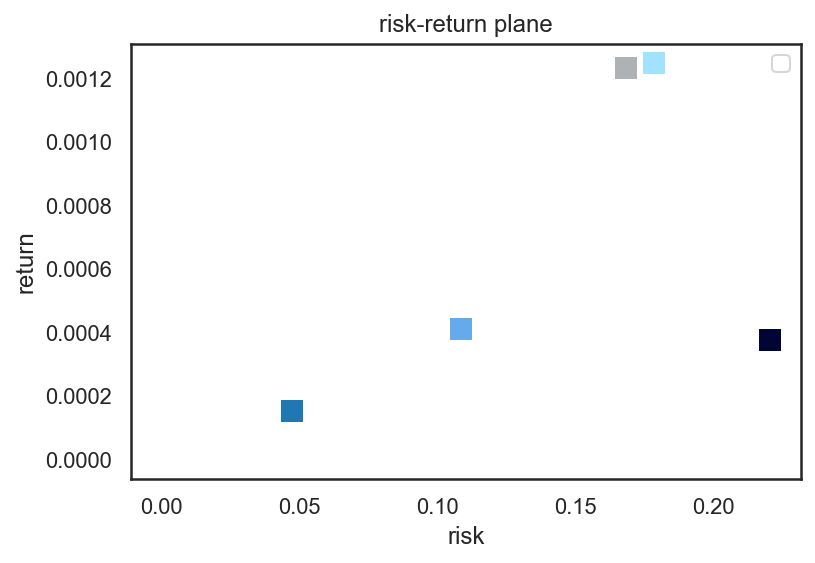

In [165]:
plt.figure()
## 주당 수익률이라 y축 단위 조정 필요할듯(년단위로)

# 주식 
week_mprofit = logret_df.mean()
plt.plot(np.sqrt(cov_mat[0][0]),week_mprofit[0], marker = 's', color = '#A1E2FF', markeredgewidth = 1, markersize = 10);

# 중기채 
week_mprofit = logret_df.mean()
plt.plot(np.sqrt(cov_mat[1][1]),week_mprofit[1], marker = 's', color = '#65ABEC', markeredgewidth = 1, markersize = 10);

# 장기채
week_mprofit = logret_df.mean()
plt.plot(np.sqrt(cov_mat[2][2]),week_mprofit[2], marker = 's', color = '#1F77B4', markeredgewidth = 1, markersize = 10);

# 원자재
week_mprofit = logret_df.mean()
plt.plot(np.sqrt(cov_mat[3][3]),week_mprofit[3], marker = 's', color = '#000536', markeredgewidth = 1, markersize = 10);

# 금
week_mprofit = logret_df.mean()
plt.plot(np.sqrt(cov_mat[4][4]),week_mprofit[4], marker = 's', color = '#AFB2B4', markeredgewidth = 1, markersize = 10);


plt.plot(0,0)
plt.title("risk-return plane")
plt.xlabel('risk')
plt.ylabel('return')
plt.legend();
# LEBEL 붙이기

No handles with labels found to put in legend.


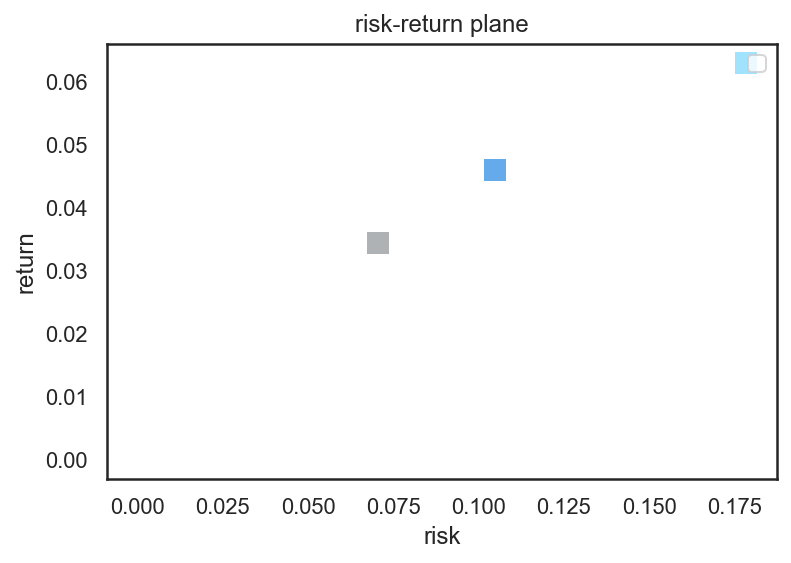

In [33]:
# 포트폴리오별 년간 risk - return 

# 주식 100%  
plt.plot(s_risk, s_return, marker = 's', color = '#A1E2FF', markeredgewidth = 1, markersize = 10);

# 주식 60% + 채권 40%   
plt.plot(s_6_risk, s_6_return, marker = 's', color = '#65ABEC', markeredgewidth = 1, markersize = 10);

# all weather 
plt.plot(aw_risk, aw_return, marker = 's', color = '#AFB2B4', markeredgewidth = 1, markersize = 10);

plt.plot(0,0)
plt.title("risk-return plane")
plt.xlabel('risk')
plt.ylabel('return')
plt.legend();

##### 2-2) 돈 잃을 가능성

In [ ]:
# 최악의 해(년단위), 최대 낙폭(주단위), mdd

In [ ]:
#  지수와 상품간 correlation 
# 마지막에 상관관계 적용해서 99% 구하기 
# 상관계수함수 쓰기

# (마지막에 신뢰도 수정)

### 4. 데이터 시각화

In [ ]:
# dataframe으로 포트폴리오 3개 비교하기 
# no, 포트폴리오명, 최초금액, 최종금액, 30년간 수익률, 최고의 해, 최악의 해, 최대 낙폭, 상관관계
# 상관관계 : 시장(s&p 500)과 포트폴리오와의 관계 -> 자산배분 잘되있다.

In [ ]:
# 상관관계 할때 hitmap 

In [ ]:
# 진짜 올웨더가 최선일까?
# 움직이는 거..
#https://m.blog.naver.com/anthouse28/221611131960

In [ ]:
# 당신은 어떤 투자 성향입니까 ?
# 공격, 중도, 안정 - 포트폴리오 퍼센트 정의 
# 입력하면, 쫙